In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
titanic_data=pd.read_csv(r"C:\Users\Subhanghi\Downloads\titanic\train.csv")
titanic_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


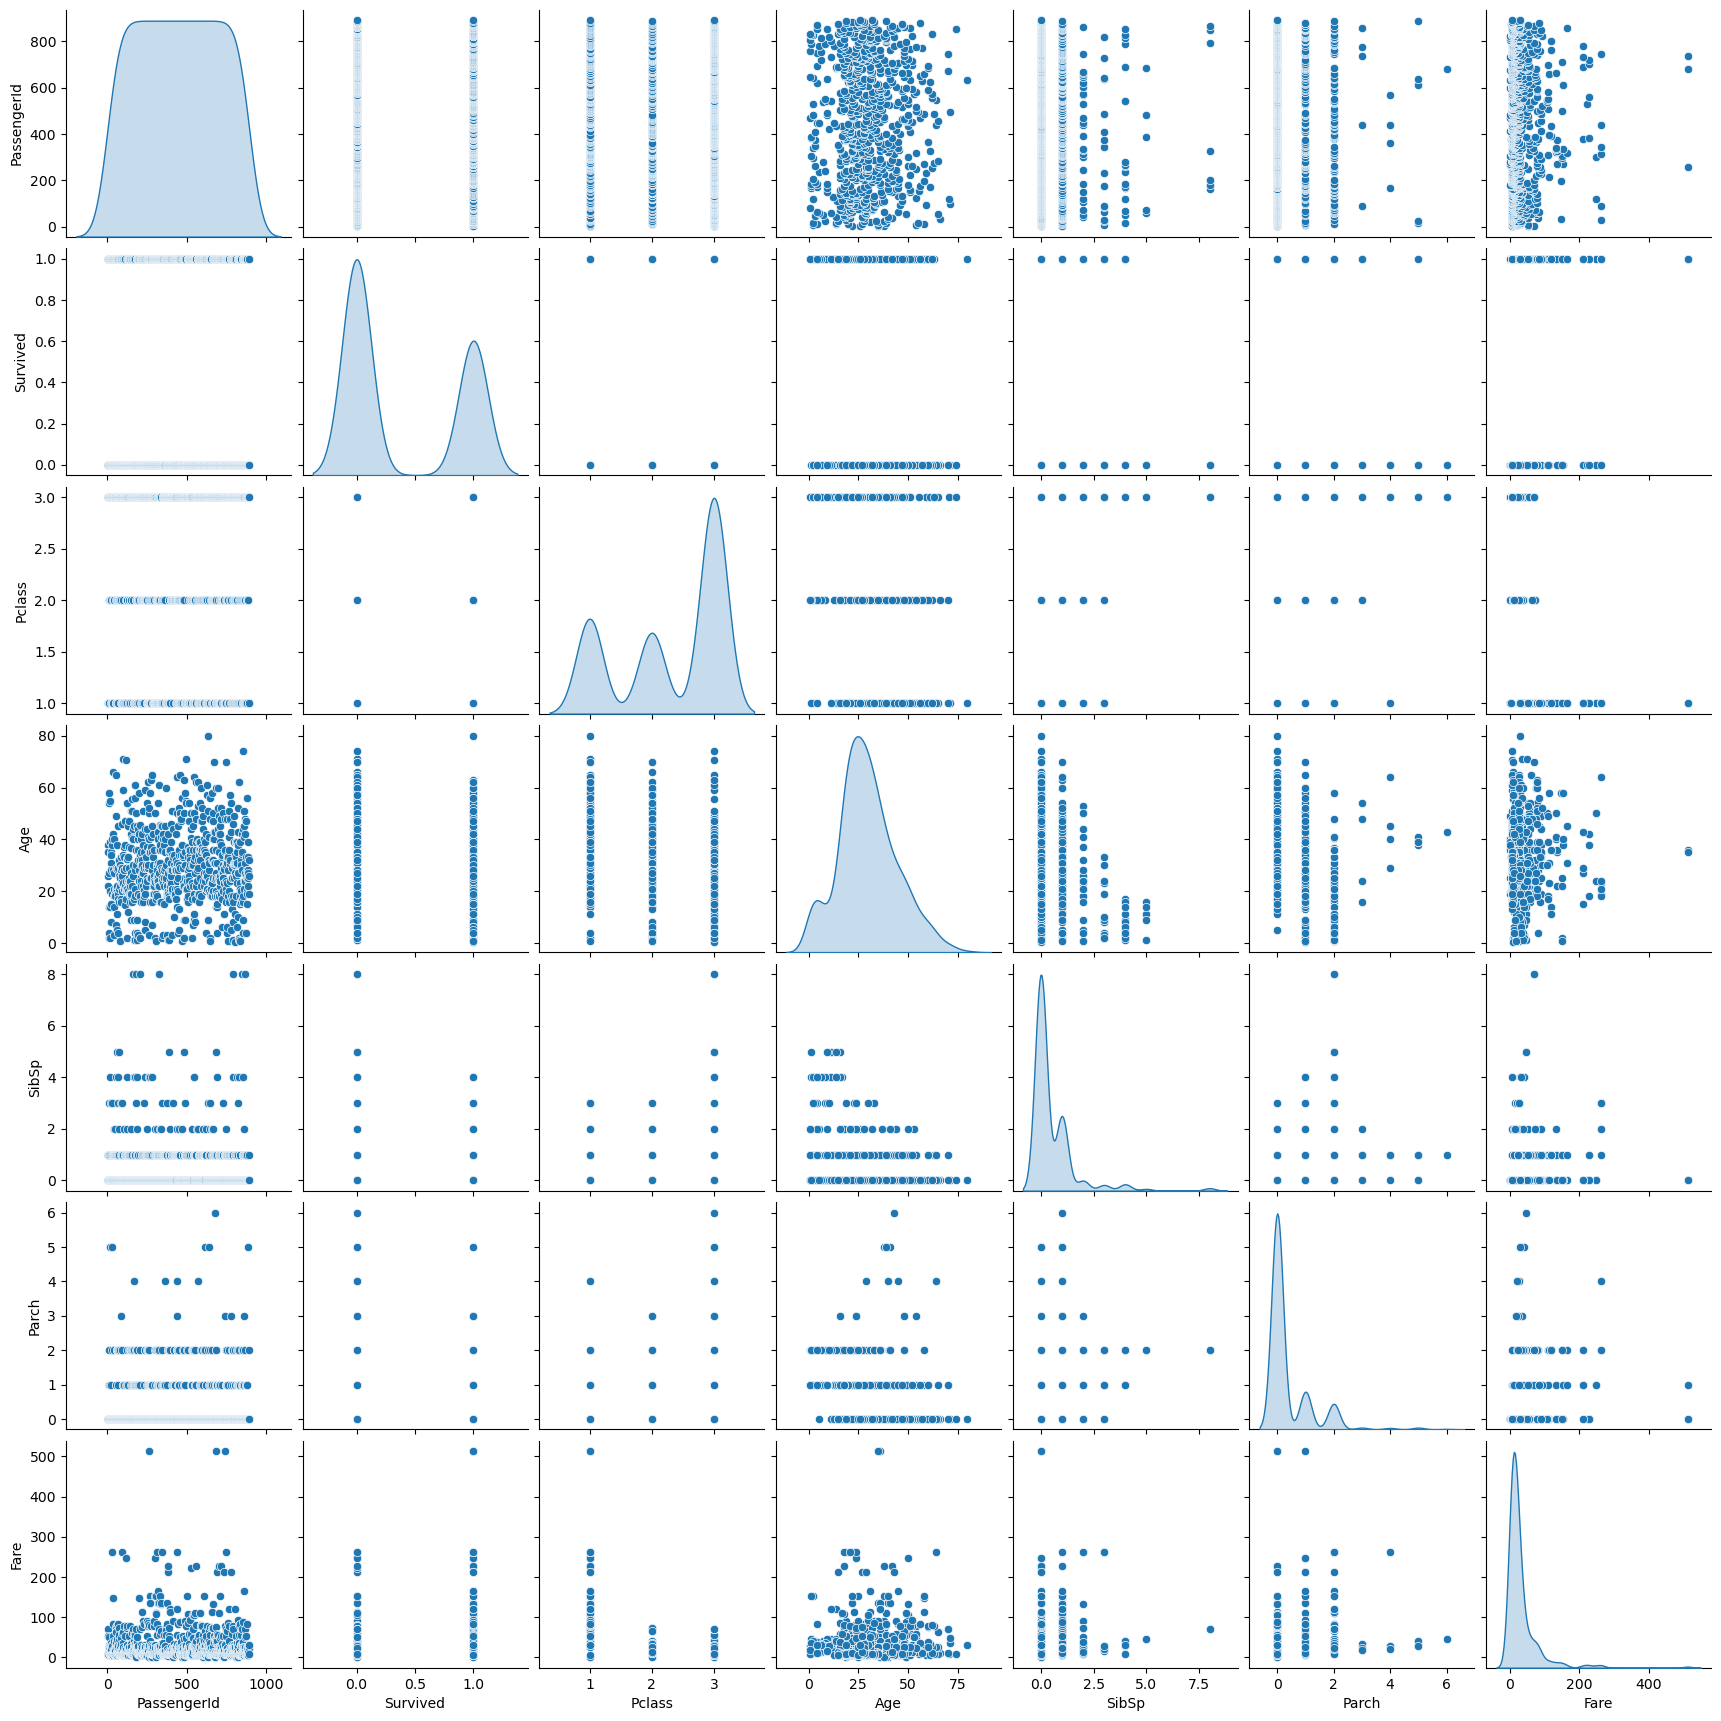

In [5]:
sns.pairplot(titanic_data,diag_kind='kde')

C:\Users\Subhanghi\AppData\Local\Temp\ipykernel_872\2812193876.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(),cmap='YlGnBu')


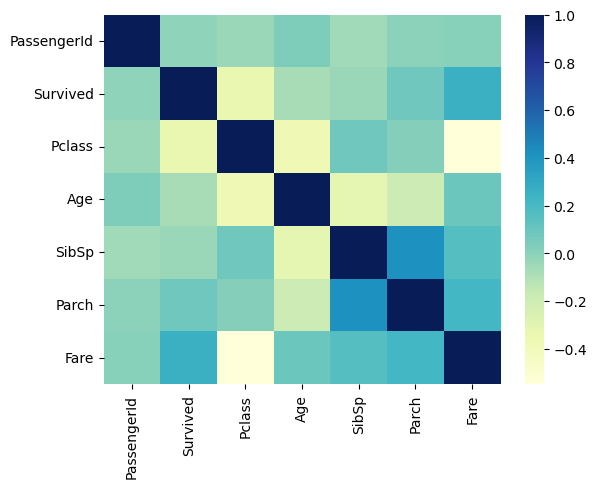

In [3]:
sns.heatmap(titanic_data.corr(),cmap='YlGnBu')
plt.show()

In [15]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices,test_indices in split.split(titanic_data,titanic_data[['Survived',"Pclass","Sex"]]):
    Strat_train_set=titanic_data.loc[train_indices]
    Strat_test_set=titanic_data.loc[test_indices]
    


In [13]:
 Strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
387,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q


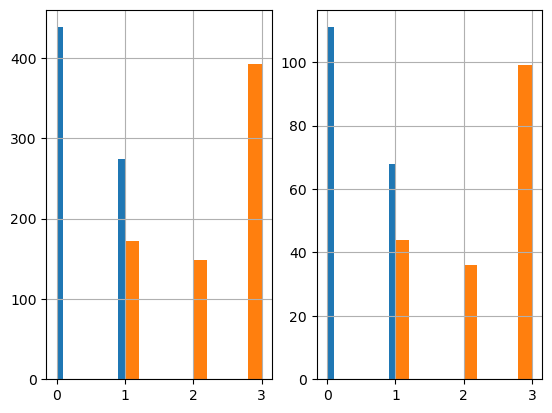

In [16]:
plt.subplot(1,2,1)
Strat_train_set["Survived"].hist()
Strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)
Strat_test_set["Survived"].hist()
Strat_test_set["Pclass"].hist()

plt.show()

In [17]:
Strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 504 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          569 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [22]:
class AgeImputer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        imputer=SimpleImputer(strategy="mean")
        X['Age']=imputer.fit_transform(X[['Age']])
        return X

In [36]:
class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder=OneHotEncoder()
        matrix=encoder.fit_transform(X[['Embarked']]).toarray()
        column_names=('C','S','Q','N')
        for i in range (len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
            matrix=encoder.fit_transform(X[['Sex']]).toarray()
            column_names=["Female","Male"]
            for i in range(len(matrix.T)):
                X[column_names[i]]=matrix.T[i]
                return X

In [37]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors='ignore')
    
    
    
    

In [38]:

    pipeline=Pipeline([("ageimputer",AgeImputer()),
                      ("featureencoder",FeatureEncoder()),
                      ("featuredropper",FeatureDropper())])

In [39]:
Strat_train_set=pipeline.fit_transform(Strat_train_set)

In [40]:
Strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Female
504,505,1,1,16.000000,0,0,86.5000,0.0,1.0
870,871,0,3,26.000000,0,0,7.8958,0.0,0.0
332,333,0,1,38.000000,0,1,153.4625,0.0,0.0
45,46,0,3,29.109701,0,0,8.0500,0.0,0.0
280,281,0,3,65.000000,0,0,7.7500,0.0,0.0
...,...,...,...,...,...,...,...,...,...
21,22,1,2,34.000000,0,0,13.0000,0.0,0.0
316,317,1,2,24.000000,1,0,26.0000,0.0,1.0
265,266,0,2,36.000000,0,0,10.5000,0.0,0.0
186,187,1,3,29.109701,1,0,15.5000,0.0,1.0


In [41]:
Strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 504 to 729
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   Female       712 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 55.6 KB


In [44]:
X=Strat_train_set.drop(['Survived'],axis=1)
y=Strat_train_set['Survived']
scaler=StandardScaler()
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()


In [45]:
X_data

array([[ 2.26915568e-01, -1.56828591e+00, -1.03661240e+00, ...,
         1.12066535e+00, -4.83703219e-01,  1.35941164e+00],
       [ 1.65388972e+00,  8.27893418e-01, -2.45890795e-01, ...,
        -5.15513981e-01, -4.83703219e-01, -7.35612358e-01],
       [-4.43684305e-01, -1.56828591e+00,  7.02975132e-01, ...,
         2.51451783e+00, -4.83703219e-01, -7.35612358e-01],
       ...,
       [-7.04906349e-01, -3.70196244e-01,  5.44830811e-01, ...,
        -4.61306468e-01, -4.83703219e-01, -7.35612358e-01],
       [-1.01291443e+00,  8.27893418e-01, -2.80920747e-16, ...,
        -3.57229374e-01, -4.83703219e-01,  1.35941164e+00],
       [ 1.10415377e+00,  8.27893418e-01, -3.24962956e-01, ...,
        -5.14906171e-01, -4.83703219e-01,  1.35941164e+00]])

In [50]:
clf=RandomForestClassifier()
param_grid=[
    {"n_estimators":[10,100,200,500], "max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]
grid_search=GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [51]:
final_clf=grid_search.best_estimator_

In [52]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=500)

In [53]:
Strat_test_set=pipeline.fit_transform(Strat_test_set)

In [54]:
Strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Female
194,195,1,1,44.000000,0,0,27.7208,1.0,1.0
743,744,0,3,24.000000,1,0,16.1000,0.0,0.0
510,511,1,3,29.000000,0,0,7.7500,0.0,0.0
667,668,0,3,32.012069,0,0,7.7750,0.0,0.0
460,461,1,1,48.000000,0,0,26.5500,0.0,0.0
...,...,...,...,...,...,...,...,...,...
836,837,0,3,21.000000,0,0,8.6625,0.0,0.0
35,36,0,1,42.000000,1,0,52.0000,0.0,0.0
66,67,1,2,29.000000,0,0,10.5000,0.0,1.0
311,312,1,1,18.000000,2,2,262.3750,1.0,1.0


In [55]:
X_test=Strat_test_set.drop(['Survived'],axis=1)
y_test=Strat_test_set['Survived']
scaler=StandardScaler()
X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [62]:
final_clf.score(X_data_test,y_data_test)

TypeError: 'tuple' object is not callable

In [60]:
final_data=pipeline.fit_transform(titanic_data)

In [61]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Female
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0
1,2,1,1,38.000000,1,0,71.2833,1.0,1.0
2,3,1,3,26.000000,0,0,7.9250,0.0,1.0
3,4,1,1,35.000000,1,0,53.1000,0.0,1.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0
887,888,1,1,19.000000,0,0,30.0000,0.0,1.0
888,889,0,3,29.699118,1,2,23.4500,0.0,1.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0


In [63]:
X_final=final_data.drop(['Survived'],axis=1)
y_final=final_data['Survived']

scaler=StandardScaler()
X_data_final=scaler.fit_transform(X_final)
y_data_final=y_final.to_numpy()

In [64]:
prod_clf=RandomForestClassifier()
param_grid=[
    {"n_estimators":[10,100,200,500], "max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]
grid_search=GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [66]:
prod_final_clf=grid_search.best_estimator_

In [67]:
titanic_test_data=pd.read_csv(r"C:\Users\Subhanghi\Downloads\titanic\test.csv")
final_test_data=pipeline.fit_transform(titanic_test_data)

In [68]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Female
0,892,3,34.50000,0,0,7.8292,0.0,0.0
1,893,3,47.00000,1,0,7.0000,0.0,1.0
2,894,2,62.00000,0,0,9.6875,0.0,0.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0
4,896,3,22.00000,1,1,12.2875,0.0,1.0
...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0
414,1306,1,39.00000,0,0,108.9000,1.0,1.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0


In [70]:
X_final_test=final_test_data
X_final_test=X_final_test.fillna(method="ffill")
scaler=StandardScaler()
X_data_final_test=scaler.fit_transform(X_final_test)


In [71]:
predictions=prod_final_clf.predict(X_data_final_test)

In [72]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
final_df=pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived']=predictions
final_df.to_csv(r"C:\Users\Subhanghi\Downloads\titanic/predictions.csv",index=False)


In [77]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
